# Section 1: Exploratory Data Analysis

## Part 1: Importing and Exploring Data

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from scipy import linalg
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [3]:
data= pd.read_csv('Data/water_potability.csv')

In [4]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
data.shape

(3276, 10)

In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
#chcking for Nan
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

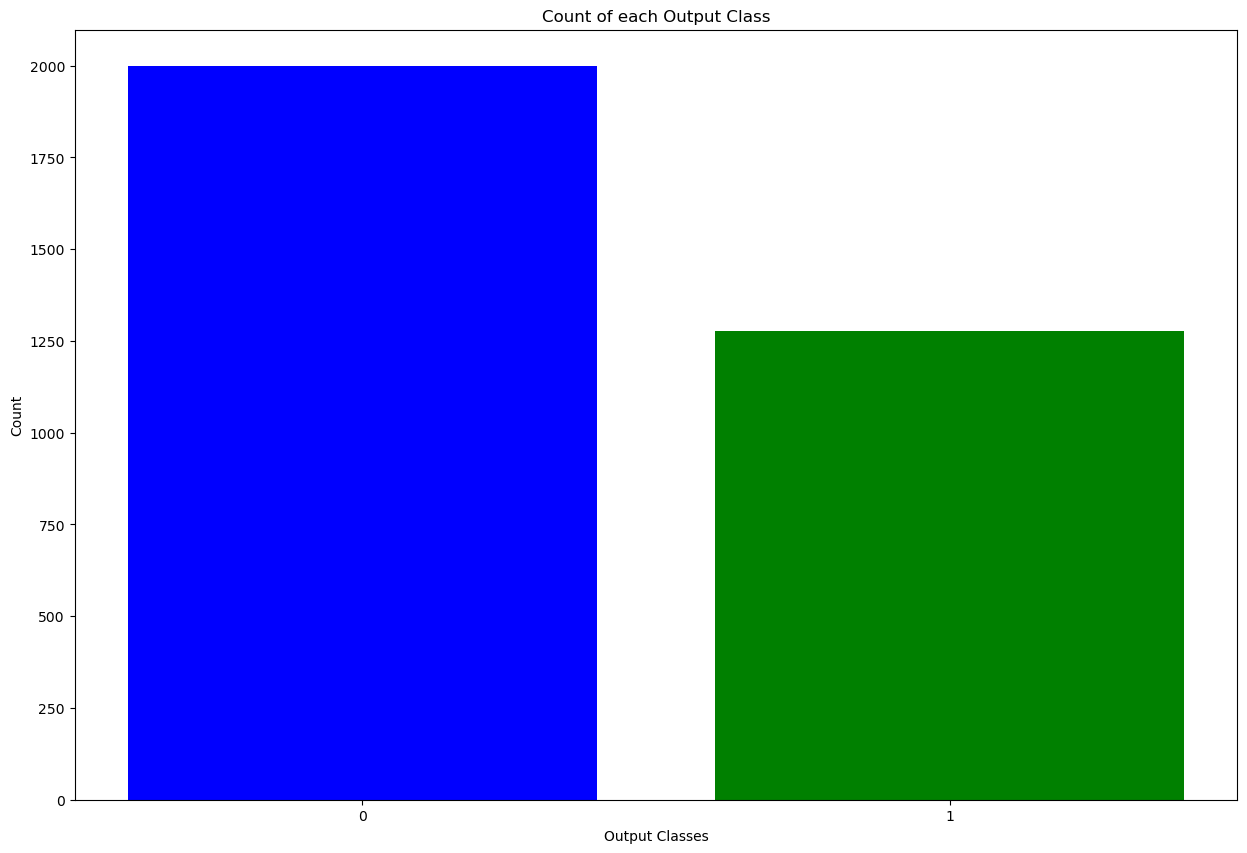

In [8]:
X_cols=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
y_col=['Potability']
data[y_col].value_counts()
# Check if the dataset is balanced
# Count the number of Portable (1) and Unportable (0)
plt.figure(figsize=(15,10))
plt.bar(data['Potability'].unique(), data['Potability'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Output Classes')
plt.ylabel('Count')
plt.title('Count of each Output Class')
plt.savefig('EDA/output_class_balance.jpg')

In [9]:
data[data[X_cols]<=0].all()

ph                 False
Hardness            True
Solids              True
Chloramines         True
Sulfate             True
Conductivity        True
Organic_carbon      True
Trihalomethanes     True
Turbidity           True
Potability          True
dtype: bool

Takeaway
1. Attributes pH, sulfate and trihalomethanes has NaN in 491, 781 and 162 tuples respectively.
2. Class labels are balanced.
3. No attributes have incorrect values (0 in pH simply indicates acidic water).

### Data Visualization

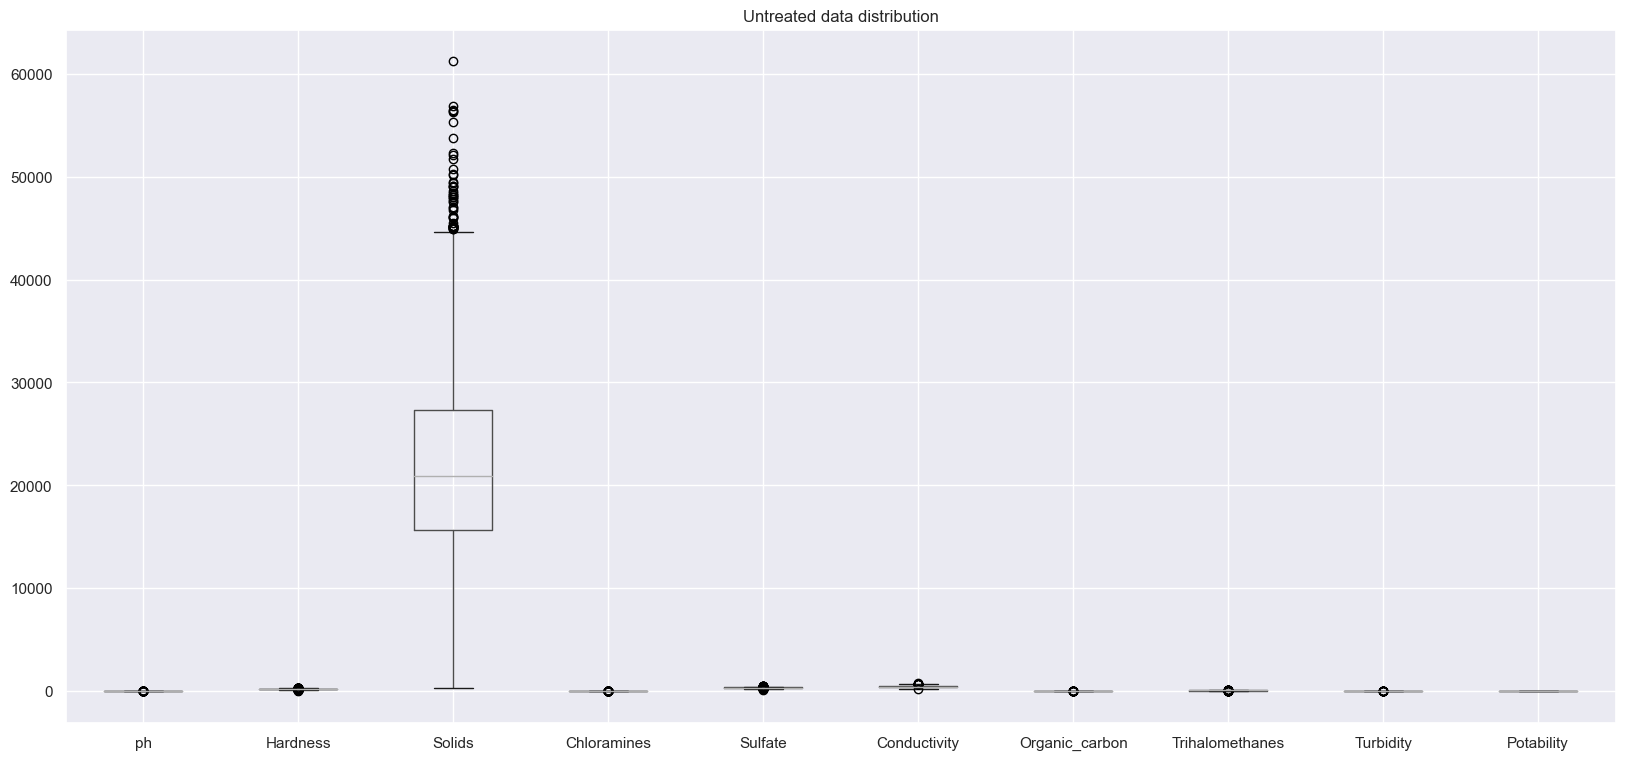

In [11]:
data.boxplot(figsize=(20,9))
plt.title("Untreated data distribution")
plt.show()

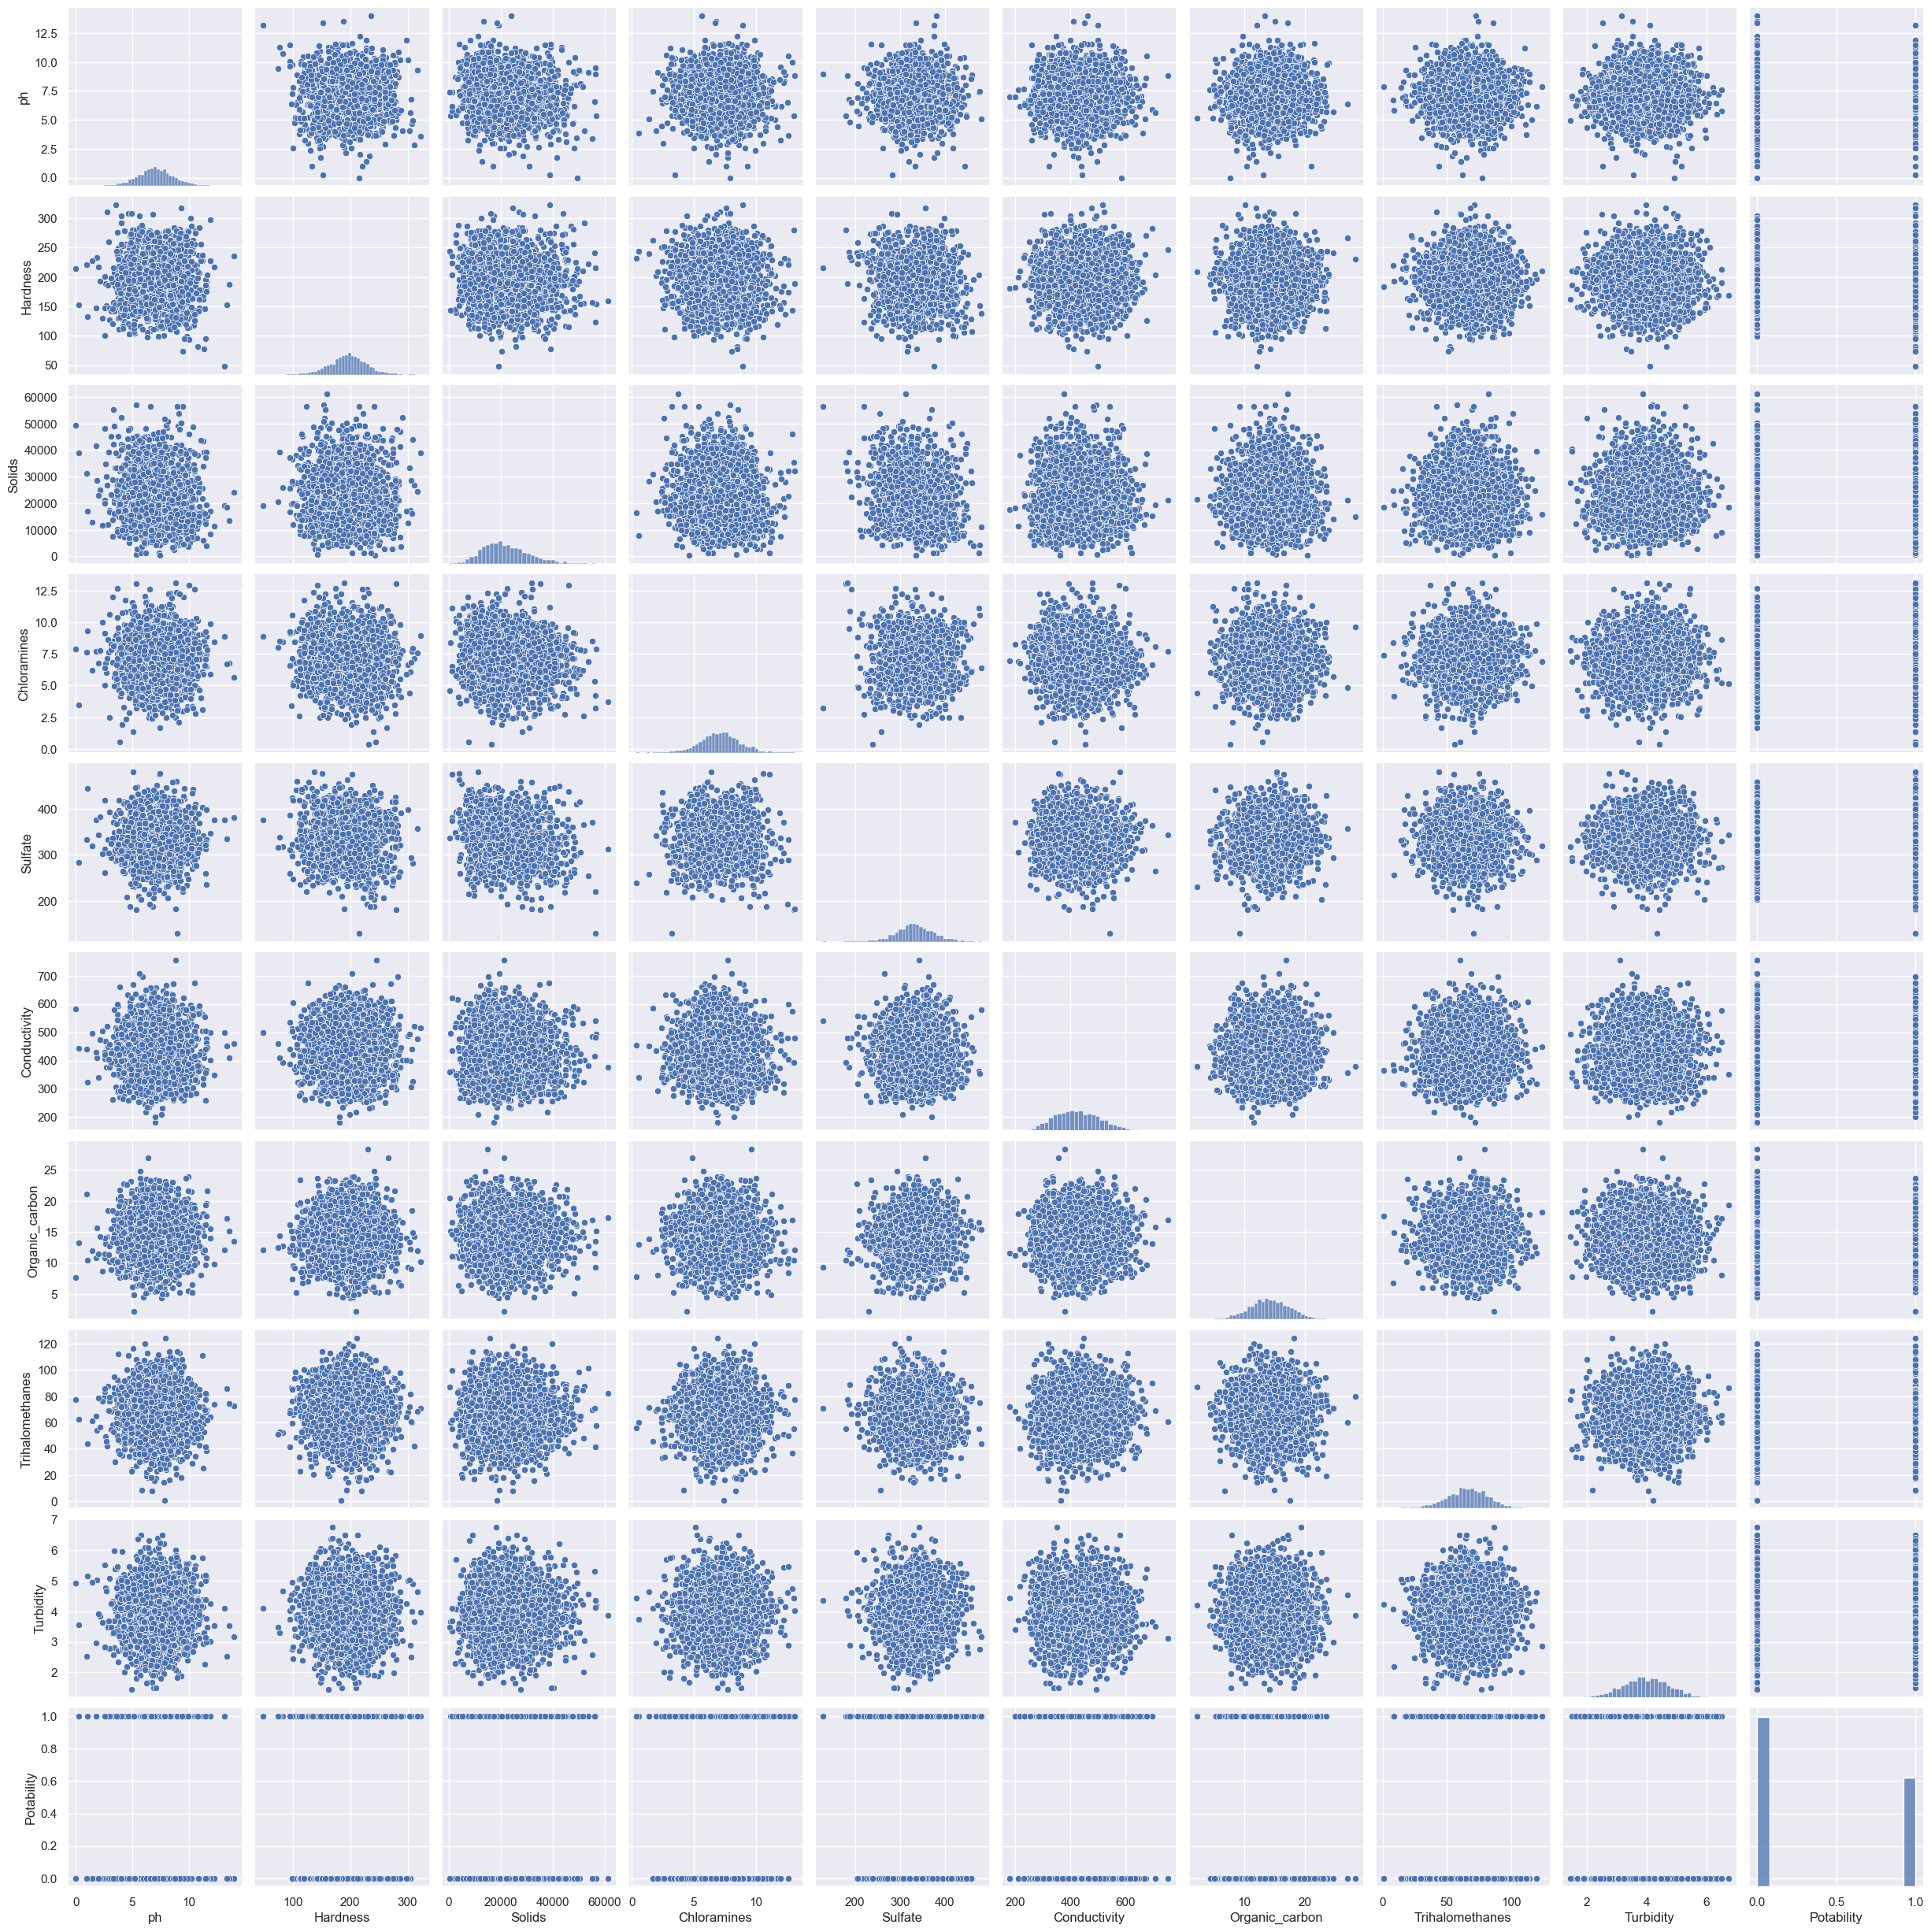

In [10]:
sns.set()
sns.pairplot(data)
plt.show()

## Part 2: Dealing with missing values

### A. Using Simpleimputer to deal with NaN

In [12]:
#using mean
imputer_mean= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean=imputer_mean.fit(data[X_cols])
data_mean=pd.DataFrame(imputer_mean.transform(data[X_cols]))

In [13]:
data_mean.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [14]:
data_mean.describe()

0            1             2            3            4  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

                 5            6            7            8  
count  3276.000000  3276.000000  3276.000000  3276.000000  
mean    426.205111    14.284970    66.396293     3.966786  
std      80.824064     3.308162    15.769881     0.780382  
min     181.483754     2.200000     0.738000     1.450000  
25%     365.734414    12.065801    56.647656     3.439711  
50%     421.884968    14.218338    66.396293     3.955028  
75%     481.792304    16.557652    76.666609     4.500320  
max     753.342620    28.300000   124.000000     6.739000

<AxesSubplot:>

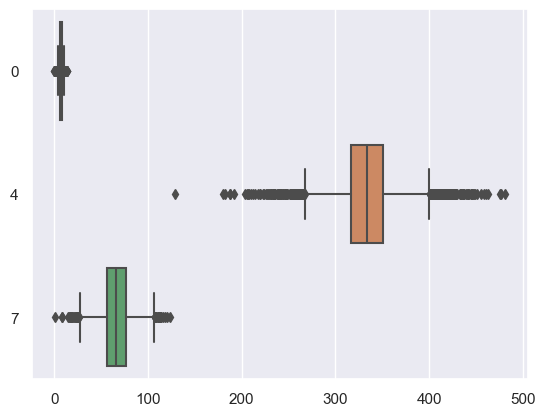

In [15]:
sns.boxplot(data=data_mean[[0,4,7]],orient='h')

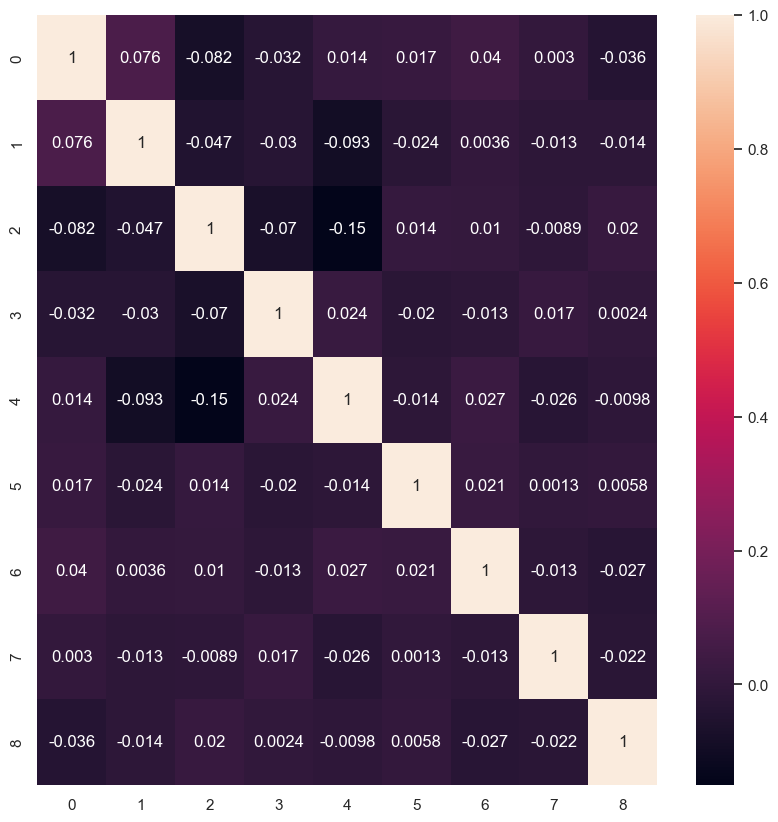

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_mean.corr(),annot=True)
plt.savefig('EDA/mean_correlation_heatmap.jpg')

In [17]:
#using median
imputer_median= SimpleImputer(missing_values=np.nan, strategy='median')
imputer_median=imputer_median.fit(data[X_cols])
data_median=pd.DataFrame(imputer_median.transform(data[X_cols]))

In [18]:
data_median.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [19]:
data_median.describe()

0            1             2            3            4  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

                 5            6            7            8  
count  3276.000000  3276.000000  3276.000000  3276.000000  
mean    426.205111    14.284970    66.407478     3.966786  
std      80.824064     3.308162    15.769958     0.780382  
min     181.483754     2.200000     0.738000     1.450000  
25%     365.734414    12.065801    56.647656     3.439711  
50%     421.884968    14.218338    66.622485     3.955028  
75%     481.792304    16.557652    76.666609     4.500320  
max     753.342620    28.300000   124.000000     6.739000

<AxesSubplot:>

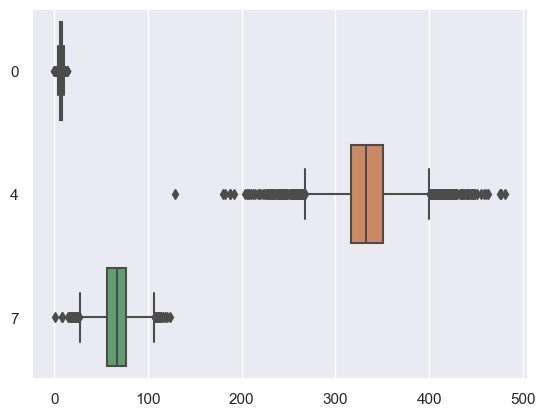

In [20]:
sns.boxplot(data=data_median[[0,4,7]],orient='h')

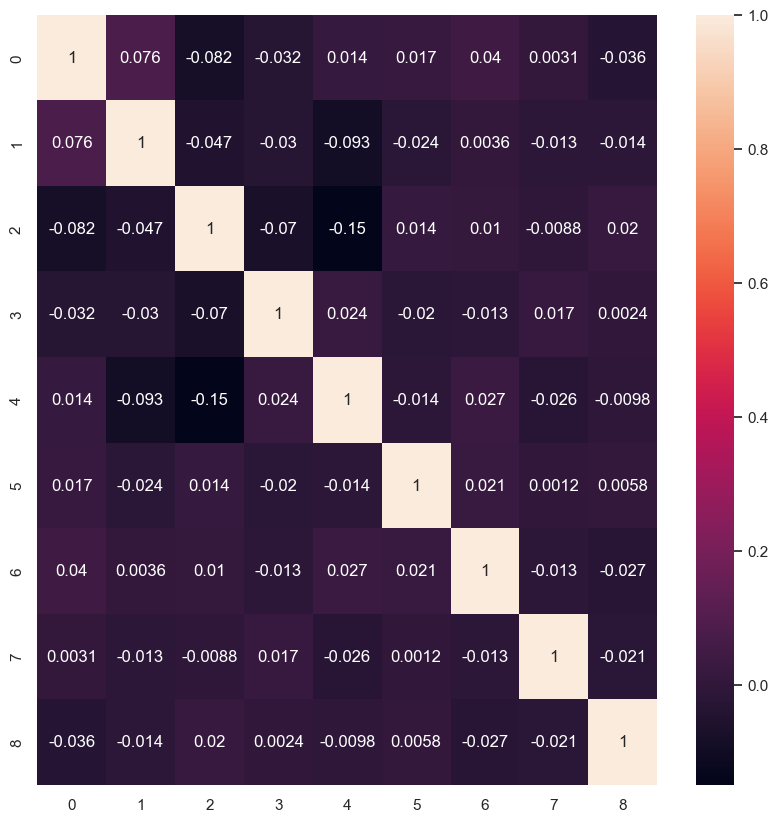

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data_median.corr(),annot=True)
plt.savefig('EDA/median_correlation_heatmap.jpg')

In [22]:
#using most frequent
imputer_most_frequent= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_most_frequent=imputer_most_frequent.fit(data[X_cols])
data_most_frequent=pd.DataFrame(imputer_most_frequent.transform(data[X_cols]),columns=data[X_cols].columns)
print(data_most_frequent.columns,data.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object') Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [23]:
data_most_frequent.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [24]:
data_most_frequent.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      6.019540   196.369496  22014.092526     7.122277   284.957131   
std       2.924207    32.879761   8768.570828     1.583085    94.457552   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       5.283146   176.850538  15666.690297     6.127421   240.722848   
50%       6.735249   196.967627  20927.833607     7.130299   318.660382   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        63.149454     3.966786  
std       80.824064        3.308162        21.245963     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        53.793688     3.439711  
50%      421.884968       14.218338        65.445962     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

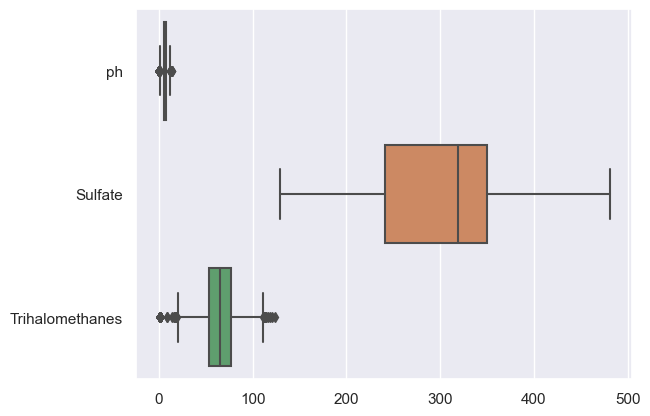

In [25]:
sns.boxplot(data=data_most_frequent[['ph','Sulfate','Trihalomethanes']],orient='h')
plt.show()

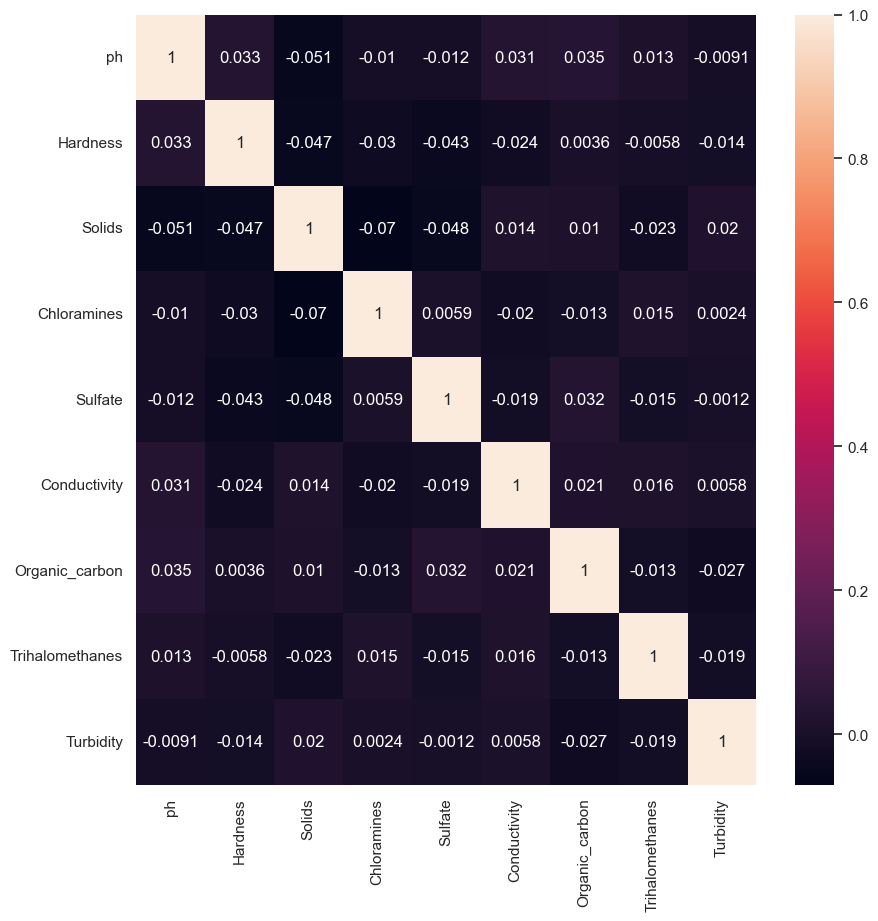

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data_most_frequent.corr(),annot=True)
plt.savefig('EDA/most_frequent_correlation_heatmap.jpg')

### B. Use MICE Imputation to fill in missing values

In [27]:
lr = LinearRegression()
mice_imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data_mice=pd.DataFrame(mice_imp.fit_transform(data), index = data.index, columns = data.columns)
data_mice.columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
print('Total missing values (NaN): ')
print(data_mice.isna().sum())
data_mice['Potability']=data_mice['Potability'].astype(int)

[IterativeImputer] Completing matrix with shape (3276, 10)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 41.78784423458109, scaled tolerance: 61.22719600771214 
[IterativeImputer] Early stopping criterion reached.
Total missing values (NaN): 
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [28]:
data_mice.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.199101  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  344.894384    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  334.706620    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

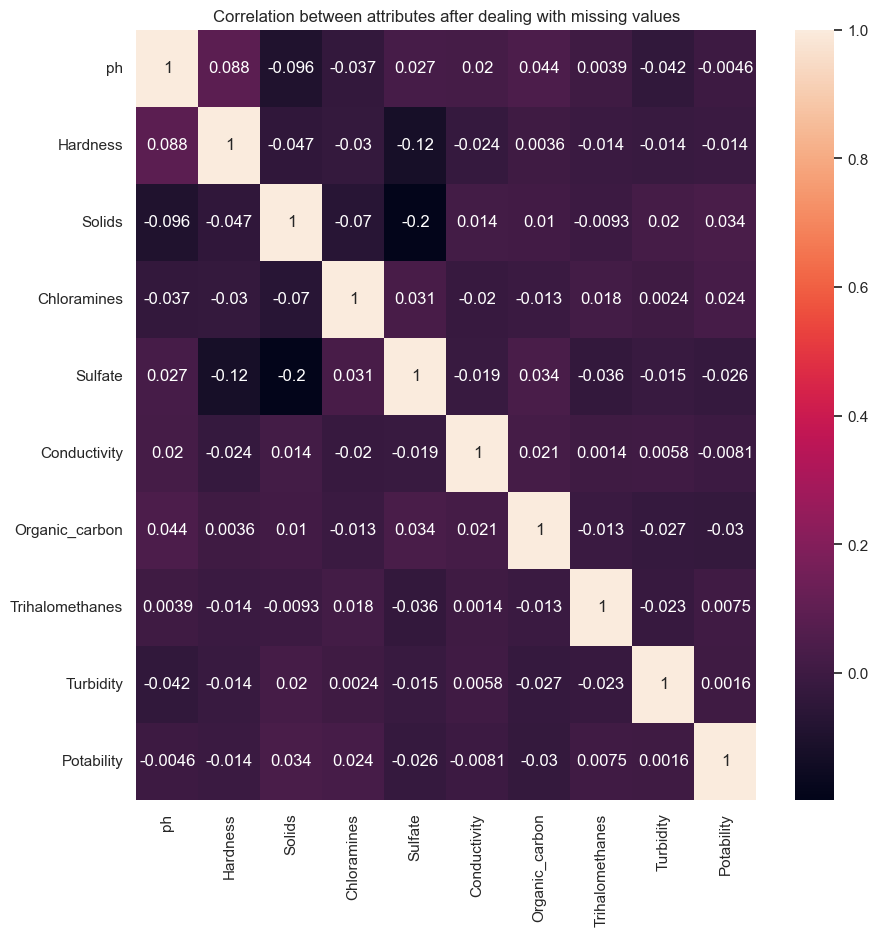

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data_mice.corr(),annot=True)
plt.title("Correlation between attributes after dealing with missing values")
plt.savefig('EDA/MICE_correlation_heatmap.jpg')

In [28]:
data_mice.to_csv("Data/MICE_imputation.csv")

Takeaway:
    As there is no difference in correlation when using mean, median and most_frequent imputation technique are used but imputation using MICE imputation has shown significant increase in correlation. Therfore, we are using MICE imputation produced dataset for further analysis.

## Part 3: Handling outliers

### A. Univariate outliers

In [46]:
# attribute 'ph'
Q1= np.percentile(data_mice['ph'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['ph'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
o_index=np.where (data_mice['ph']<lower_bound)
#replacing outlier with median
data_mice['ph'].mask(data_mice['ph']>upper_bound,np.median(data_mice['ph']),inplace=True)
data_mice['ph'].mask(data_mice['ph']<lower_bound,np.median(data_mice['ph']),inplace=True)

In [31]:
# attribute Trihalomethanes
Q1= np.percentile(data_mice['Trihalomethanes'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Trihalomethanes'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Trihalomethanes'].mask(data_mice['Trihalomethanes']>upper_bound,np.median(data_mice['Trihalomethanes']),inplace=True)
data_mice['Trihalomethanes'].mask(data_mice['Trihalomethanes']<lower_bound,np.median(data_mice['Trihalomethanes']),inplace=True)


In [32]:
# attribute Hardness
Q1= np.percentile(data_mice['Hardness'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Hardness'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Hardness'].mask(data_mice['Hardness']>upper_bound,np.median(data_mice['Hardness']),inplace=True)
data_mice['Hardness'].mask(data_mice['Hardness']<lower_bound,np.median(data_mice['Hardness']),inplace=True)


In [33]:
# attribute Solids
Q1= np.percentile(data_mice['Solids'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Solids'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Solids'].mask(data_mice['Solids']>upper_bound,np.median(data_mice['Solids']),inplace=True)
data_mice['Solids'].mask(data_mice['Solids']<lower_bound,np.median(data_mice['Solids']),inplace=True)




In [38]:
# attribute Chloramines
Q1= np.percentile(data_mice['Chloramines'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Chloramines'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Chloramines'].mask(data_mice['Chloramines']>upper_bound,np.median(data_mice['Chloramines']),inplace=True)
data_mice['Chloramines'].mask(data_mice['Chloramines']<lower_bound,np.median(data_mice['Chloramines']),inplace=True)


In [39]:
# attribute Conductivity
Q1= np.percentile(data_mice['Conductivity'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Conductivity'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Conductivity'].mask(data_mice['Conductivity']>upper_bound,np.median(data_mice['Conductivity']),inplace=True)
data_mice['Conductivity'].mask(data_mice['Conductivity']<lower_bound,np.median(data_mice['Conductivity']),inplace=True)


In [40]:
# attribute Organic_carbon
Q1= np.percentile(data_mice['Organic_carbon'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Organic_carbon'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
data_mice['Organic_carbon'].mask(data_mice['Organic_carbon']>upper_bound,np.median(data_mice['Organic_carbon']),inplace=True)
data_mice['Organic_carbon'].mask(data_mice['Organic_carbon']<lower_bound,np.median(data_mice['Organic_carbon']),inplace=True)


In [41]:
# attribute Turbidity
Q1= np.percentile(data_mice['Turbidity'],25,interpolation='midpoint')
Q3= np.percentile(data_mice['Turbidity'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
o_index_l=np.where (data_mice['Turbidity']<lower_bound)
#print(len(o_index_l[0]))
o_index_u=np.where (data_mice['Turbidity']>upper_bound)
#print(len(o_index_u[0]))
data_mice['Turbidity'].mask(data_mice['Turbidity']>upper_bound,np.median(data_mice['Turbidity']),inplace=True)
data_mice['Turbidity'].mask(data_mice['Turbidity']<lower_bound,np.median(data_mice['Turbidity']),inplace=True)


### B. Multivariate outliers with Minimum Covariance Determinants

As, this is a supervised dataset and all the attributes has normal distribution we can used MCD.

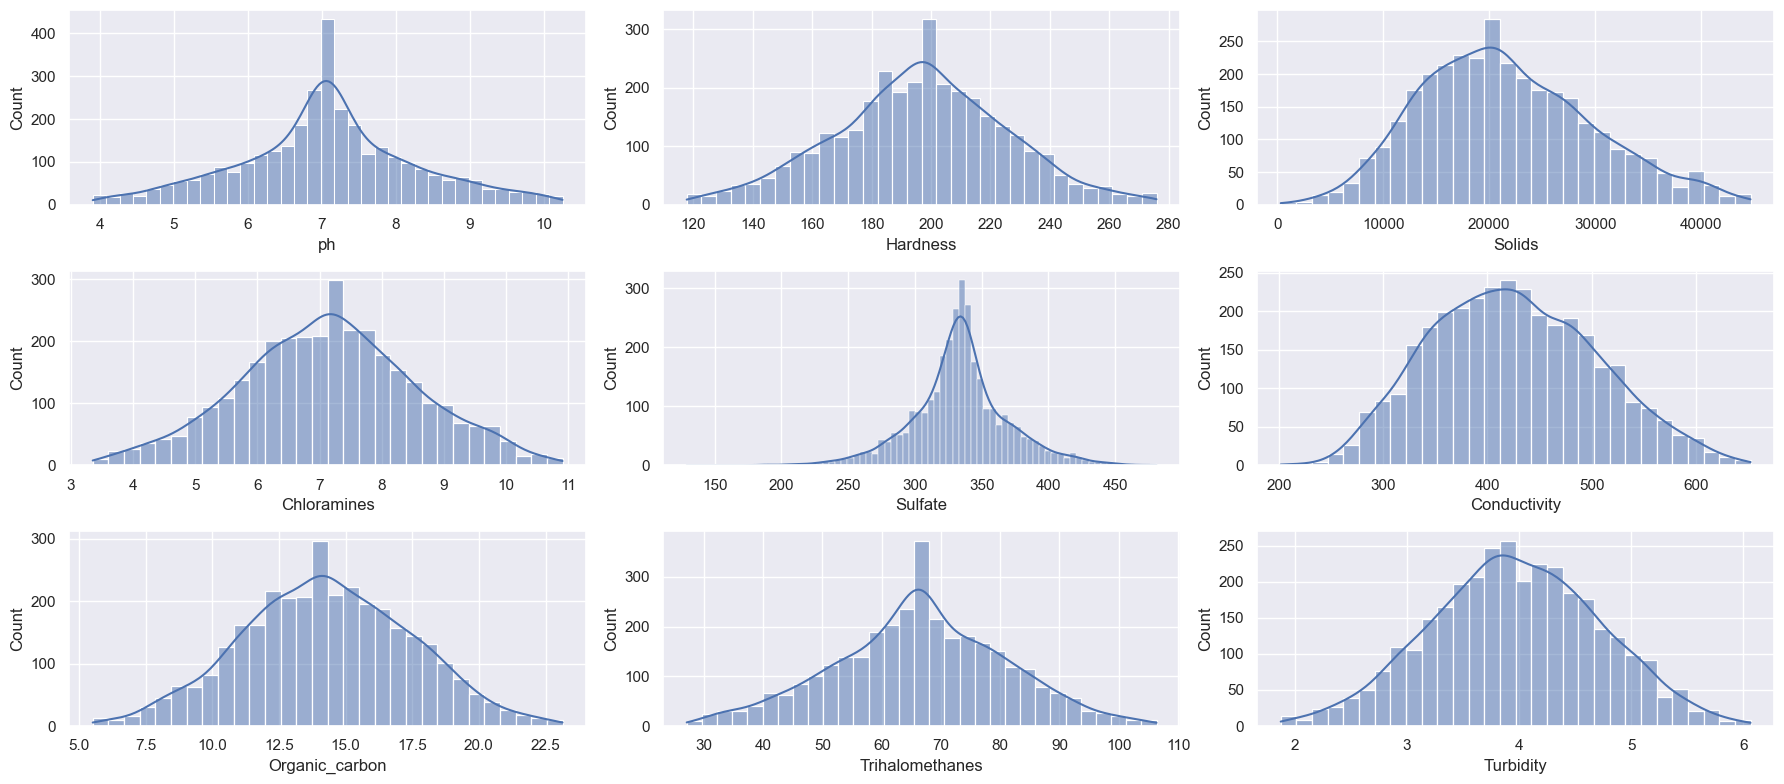

In [43]:
fig, ax= plt.subplots(3,3, figsize=(18,8))
columns=data_mice.columns
ax=ax.ravel()
for column, ax in zip(columns,ax):
    sns.histplot(data=data_mice[column], kde=True,ax=ax)
fig.tight_layout()
plt.show()



In [44]:
cov=MinCovDet(random_state=0).fit(data_mice)
cov_metric=cov.covariance_
cov_mean=cov.location_
#inc_cov_met=sp.lonalg.inv(cov_metric)
m=cov.mahalanobis(data_mice)


x_minus_mu=data_mice-cov_mean
inv_covmat=linalg.inv(cov_metric)
left_term=np.dot(x_minus_mu,inv_covmat)
mahal=np.dot(left_term,x_minus_mu.T)
matrix=np.sqrt(mahal.diagonal())
outlier=[]
C=np.sqrt(chi2.ppf((1-0.001),df=data_mice.shape[1]))
for i, v in enumerate(matrix):
    if v >C:
        outlier.append(i)
    else:
        continue


In [47]:
len(outlier)

34

In [48]:
data_mice.iloc[outlier]

ph    Hardness        Solids  Chloramines     Sulfate  \
118   7.397413  122.541040   8855.114121     6.888689  241.607532   
126   7.039645  252.670469  29368.674184     9.906147  433.952212   
199   7.060101  125.474884  11215.945902     5.366011  261.444798   
248   6.581878  272.982745  37169.444404     8.114731  416.083481   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
275   5.324942  196.967627  35344.658047     7.130299  180.206746   
290   4.790841  268.720881  17862.369003     4.554574  377.241161   
313   5.862641  185.065220  44069.272158     4.382721  412.690111   
345   9.567823  173.111498  38787.462705     5.150000  444.970552   
351   8.848586  188.919983  32033.332019     7.130299  182.397370   
357   7.748655  239.788278  29331.236633    10.713097  217.000607   
363   4.812434  250.183954  11465.575643     4.362641  398.161904   
365   4.788861  234.893703  28174.620516    10.850036  187.424131   
385   5.541979  185.671874  20143.065262    10.236176  209.471058   
782   7.998090  241.000277   9609.740605     9.842346  229.575561   
1106  6.879959  163.593339  44586.812651     7.130230  219.148935   
1186  9.484703  122.906991  20927.833607     4.219711  219.553437   
1366  5.754213  241.602430  31871.291239     7.299302  203.444521   
1502  7.060134  196.603746  37215.226835     7.408018  247.934855   
1537  7.381758  203.460302   1372.091043     7.130299  475.737460   
1554  8.942046  215.673786  20927.833607     7.130247  129.000000   
1605  7.445189  150.775723   4168.196994    10.573403  476.539717   
1642  6.916726  155.262609  42617.303399     5.829424  449.267688   
1669  5.915944  274.263618   6967.735565    10.069435  247.645743   
1765  9.497261  124.482810  33681.330140     4.814656  427.184508   
1766  7.984711  121.067357  40709.781663     5.796841  445.359547   
1773  8.518532  128.263466  32018.289631     6.058740  458.441072   
1798  6.467868  236.694648   7656.413248     9.840949  214.460834   
1831  7.079304  137.007355  24282.154769     5.705693  433.633900   
1836  9.313466  133.141751  41982.610655     6.628037  417.245388   
2318  5.057736  137.689344  11229.137777     6.411410  481.030642   
2717  6.874419  233.063426  36640.371366    10.000218  435.115189   
2930  9.764658  119.164010  38781.457422     9.334632  380.230634   
3215  5.608623  271.882219  43680.222521     4.157335  366.866533   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
118     489.851600       13.365906        69.517410   3.149158           0  
126     465.216621       13.221034        84.198607   5.052737           0  
199     445.241457       18.575921        86.433655   4.460201           0  
248     351.476839       15.129334        79.261026   4.201663           0  
253     376.456593       11.432466        73.777275   3.854940           1  
275     392.421496       10.504820        55.084668   4.427138           1  
290     608.846856       10.806313        83.702236   3.258859           1  
313     331.570139       15.306079        59.605812   5.507421           1  
345     492.411524       12.904221        48.481477   4.197919           1  
351     479.791975       12.070444        77.671337   4.014682           1  
357     441.529547       16.389384        69.237874   2.511810           1  
363     607.026542       18.210032        62.511467   3.020996           1  
365     444.854321       11.784799        89.010974   2.896852           1  
385     517.935786       18.464015        49.371319   3.672976           1  
782     428.882366       14.990567        39.842379   2.626547           1  
1106    554.045105       16.521942        67.533260   5.688207           1  
1186    480.848063       13.533433        41.731219   4.132274           1  
1366    495.945344       22.763707        71.428978   5.920234           0  
1502    522.548553        5.512040        77.830816   3.393325           1  
1537    361.342496       16.548438        55.132546   3.

As, there are less than 2% of the data are outliers, we have chosen to drop them.

In [49]:
data_preprocessed=data_mice.drop(outlier,axis=0)

In [50]:
data_preprocessed.shape

(3242, 10)

In [51]:
data_preprocessed.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.199101  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  7.060069  129.422921  18630.057858     6.635246  344.894384    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  334.706620    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [44]:
data_preprocessed.to_csv('Data/data_preprocessed.csv')

## Part 4: Univariate analysis on cleaned dataset

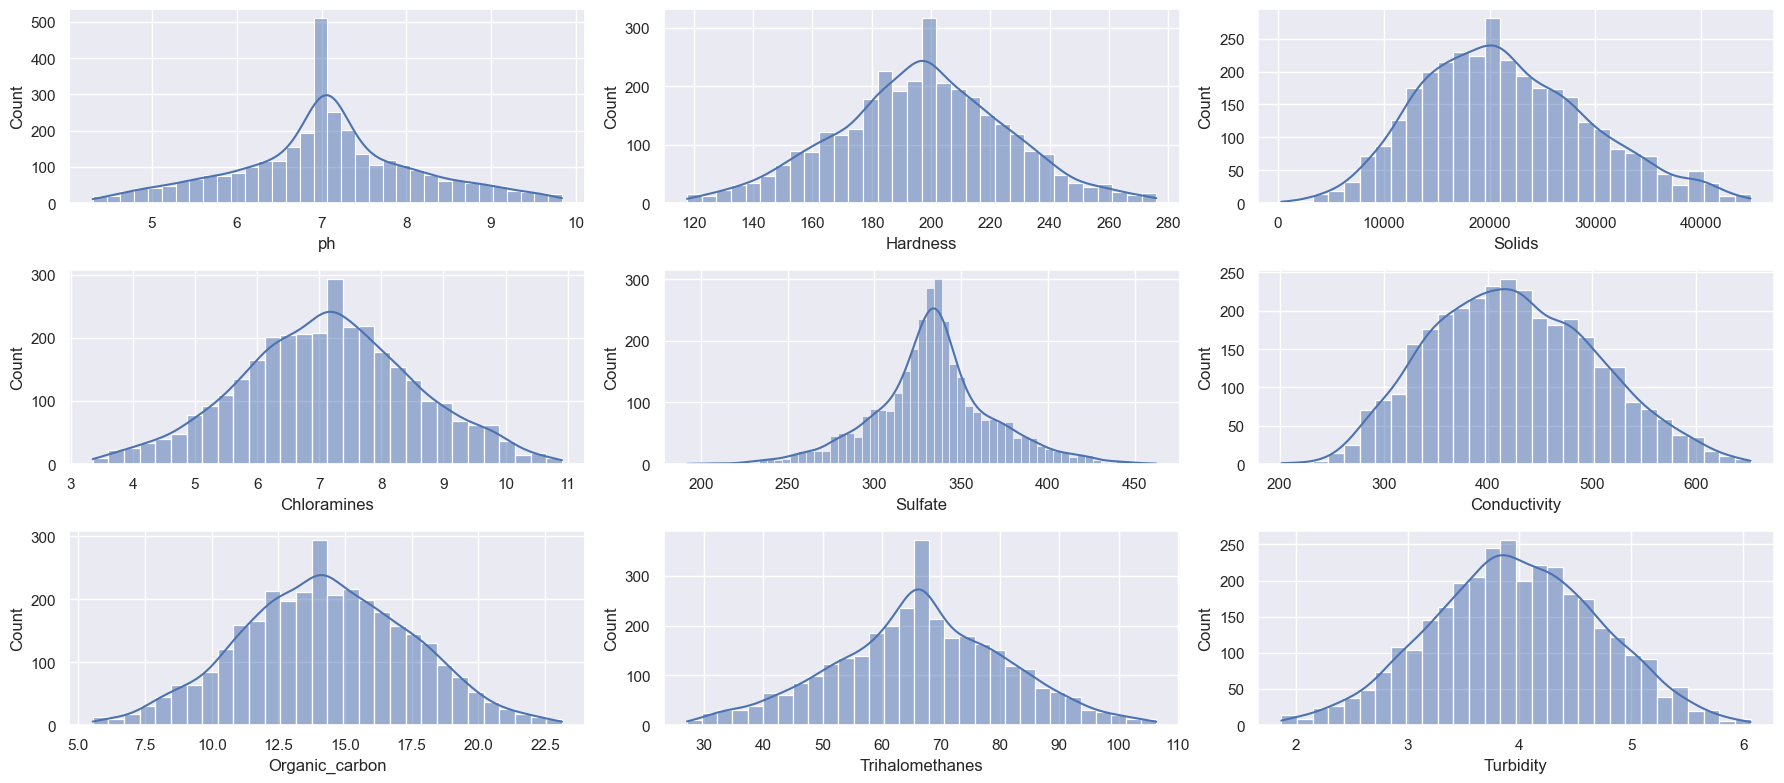

In [56]:
fig, ax= plt.subplots(3,3, figsize=(18,8))
columns=data_preprocessed.columns
ax=ax.ravel()
for column, ax in zip(columns,ax):
    sns.histplot(data=data_preprocessed[column], kde=True,ax=ax)
fig.tight_layout()
plt.savefig('EDA/histogram_preprocessed_data.jpg')
plt.show()

Text(0.5, 1.0, 'Boxplot of data after dealing with missing values')

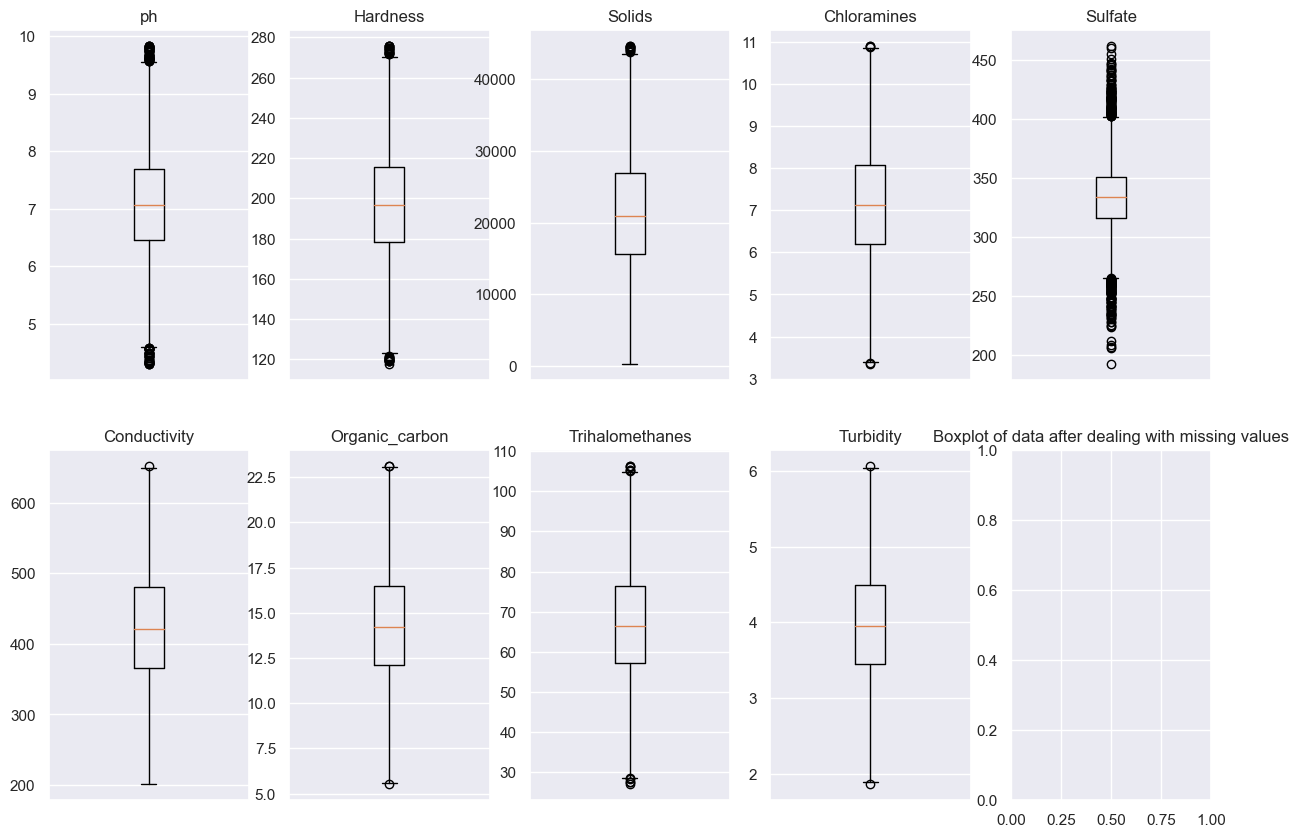

In [57]:
# Boxplots
def draw_boxplot(plot, row, col, column, name):
     plot[row, col].boxplot(column)
     plot[row, col].set_title(name)
     plot[row, col].set_xticks([])
#
fig, ax = plt.subplots(2, 5, figsize=(15,10))
draw_boxplot(ax, 0, 0, data_preprocessed['ph'], 'ph')
draw_boxplot(ax, 0, 1, data_preprocessed['Hardness'], 'Hardness')
draw_boxplot(ax, 0, 2, data_preprocessed['Solids'], 'Solids')
draw_boxplot(ax, 0, 3, data_preprocessed['Chloramines'], 'Chloramines')
draw_boxplot(ax, 0, 4, data_preprocessed['Sulfate'], 'Sulfate')
draw_boxplot(ax, 1, 0, data_preprocessed['Conductivity'], 'Conductivity')
draw_boxplot(ax, 1, 1, data_preprocessed['Organic_carbon'], 'Organic_carbon')
draw_boxplot(ax, 1, 2, data_preprocessed['Trihalomethanes'], 'Trihalomethanes')
draw_boxplot(ax, 1, 3, data_preprocessed['Turbidity'], 'Turbidity')
#draw_boxplot(ax, 1, 4, data_mice['Potability'], 'Potability')
plt.savefig('EDA/boxplot_preprocessed_data.jpg')
plt.title("Boxplot of data after dealing with missing values")

## Part 5: Bivariate analysis

### A. Pairplot

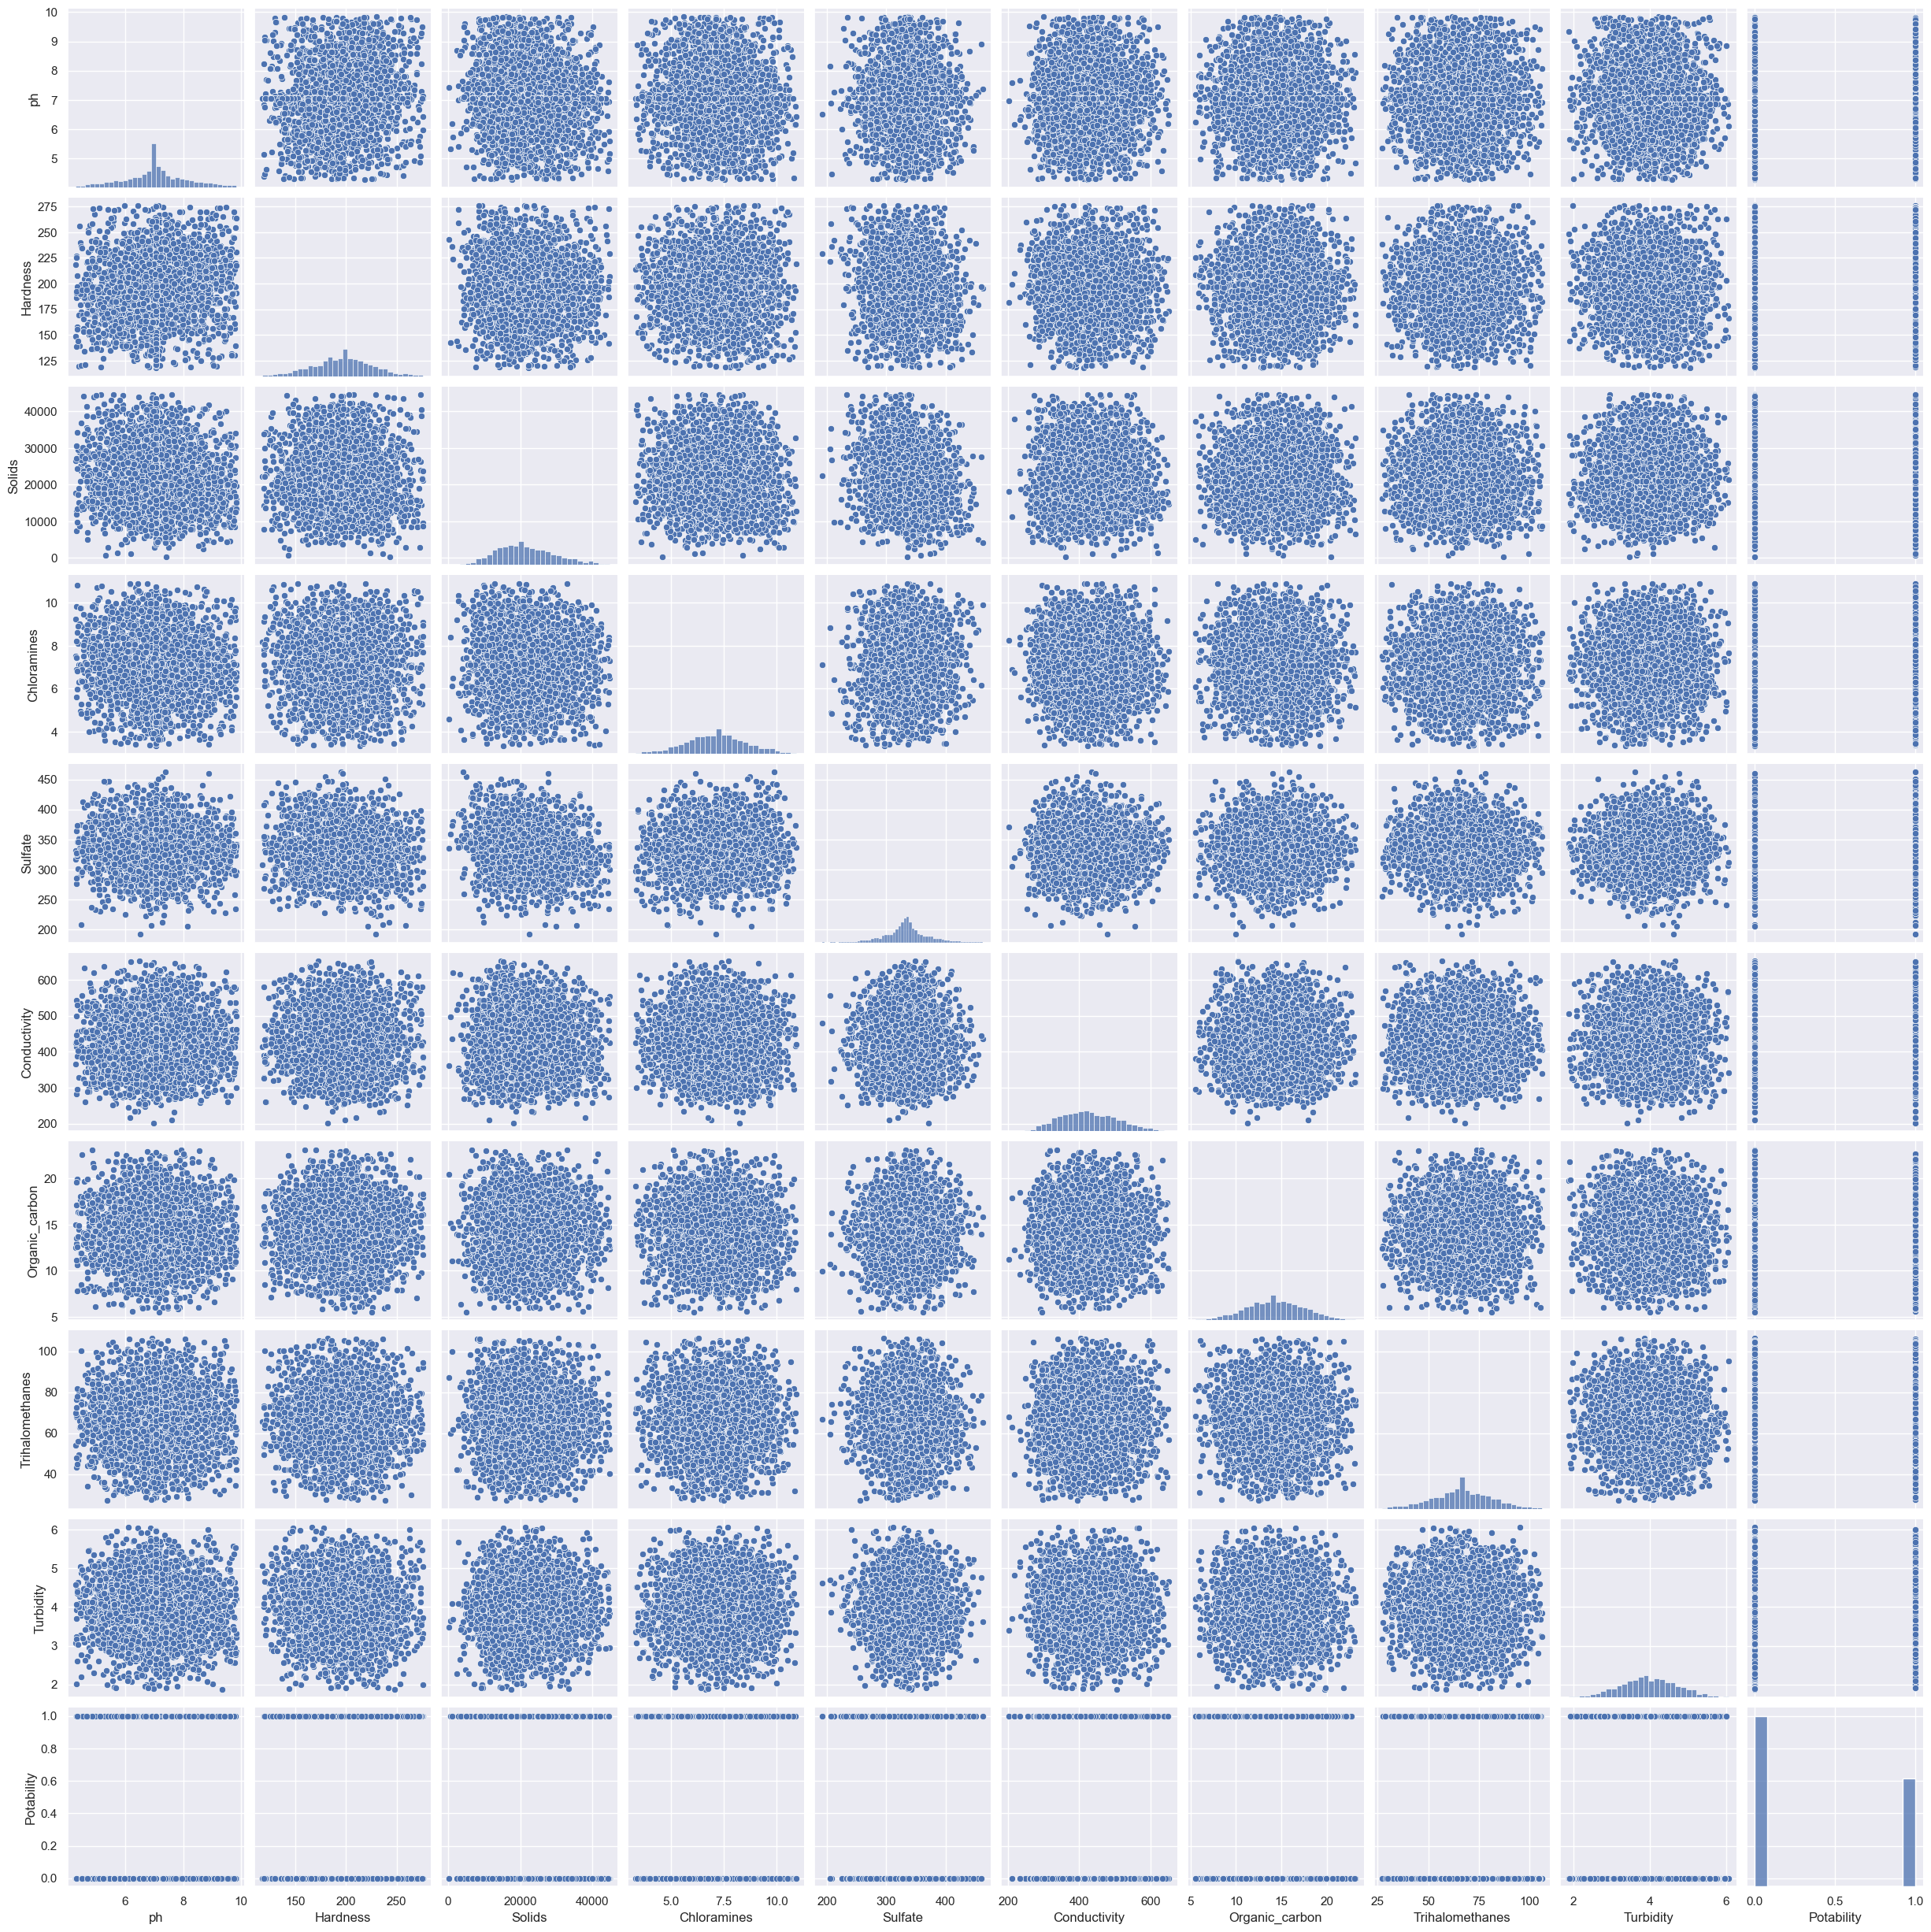

In [59]:
sns.set()
sns.pairplot(data_preprocessed)
plt.show()

### B. Correlation heatmap (using Pearson's correlation coefficient)

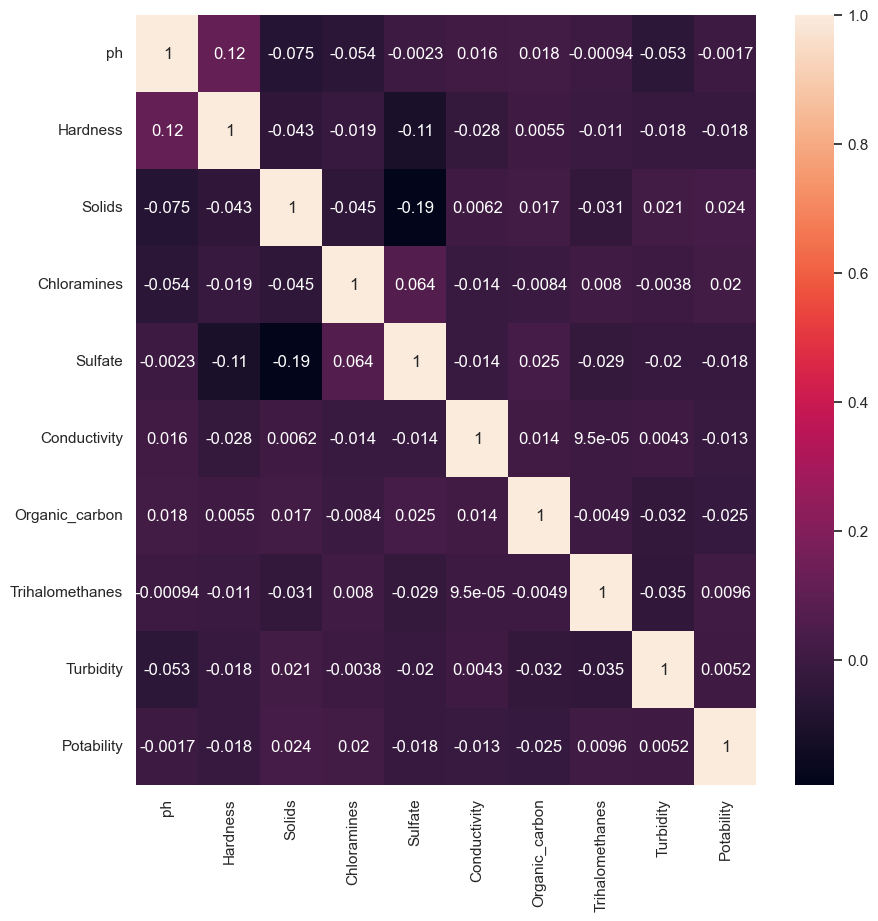

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(data_preprocessed.corr(),annot=True)
plt.savefig('EDA/preprocessed_correlation_heatmap.jpg')
plt.show()

### EDA Summary
1. Data has 9 attributes as ‘ph’,'Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity', and outcome attribute as ‘Potability’.
2. 61% of data is classified as Potable (1) and 39% is for not potable (0).
3. Since the correlation between each attribute was not strong, we will consider all the attributes for preprocessing and modelling.
4. Data has missing values for attributes ‘ph’, 'Sulfate' and 'Trihalomethanes'. In order to deal with them, we employed simple imputation with mean, median and most frequent, as well as Multivariate Imputation by Chain Equation (MICE) .It was noted that correlation between attributes has been improved after applying MICE imputation.
5. There is no presence of incorrect values in any attributes.
6. Uni-variate outliers has been detected with interquartile range and replaced by median for each attribute.
7. Multivariate outliers were detected using Minimum Covariance Determinant. Since outliers were less than 2%, they are dropped.

